# Template Model

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# import data
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 6s 0us/step


In [ ]:
# loader
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# model
num_classes = len(train_ds.class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 118s 1s/step - loss: 1.3492 - accuracy: 0.4162 - val_loss: 1.0918 - val_accuracy: 0.5531
Epoch 2/10
92/92 [==============================] - 108s 1s/step - loss: 1.0011 - accuracy: 0.5960 - val_loss: 0.9727 - val_accuracy: 0.6294
Epoch 3/10
92/92 [==============================] - 106s 1s/step - loss: 0.7957 - accuracy: 0.7044 - val_loss: 0.9927 - val_accuracy: 0.6090
Epoch 4/10
92/92 [==============================] - 107s 1s/step - loss: 0.5914 - accuracy: 0.7820 - val_loss: 1.0390 - val_accuracy: 0.6172
Epoch 5/10
92/92 [==============================] - 107s 1s/step - loss: 0.3581 - accuracy: 0.8736 - val_loss: 1.2641 - val_accuracy: 0.6322
Epoch 6/10
92/92 [==============================] - 115s 1s/step - loss: 0.2286 - accuracy: 0.9264 - val_loss: 1.4720 - val_accuracy: 0.6253
Epoch 7/10
92/92 [==============================] - 103s 1s/step - loss: 0.1590 - accuracy: 0.9499 - val_loss: 1.6546 - val_accuracy: 0.6131
Epoch 8/10
92

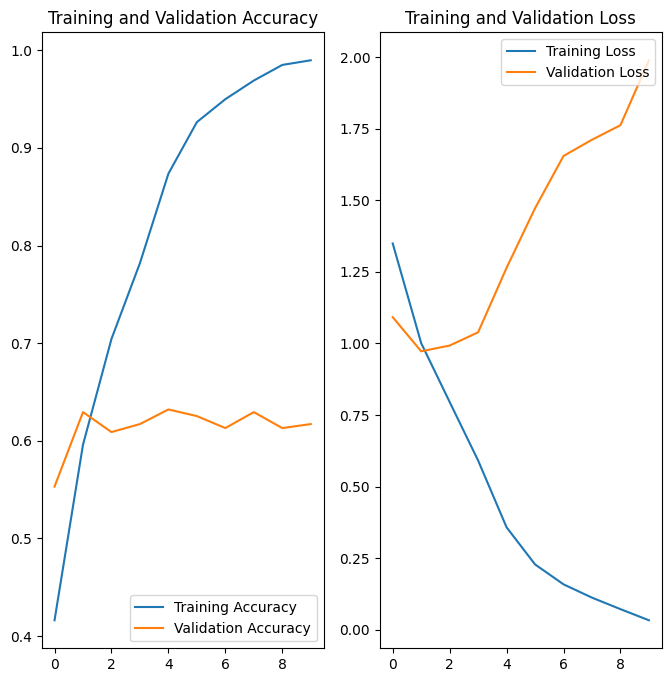

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# New Model

In [ ]:
# new model

newModel = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
# compile model
newModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
newModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 128)      

In [ ]:
epochs=5
history = newModel.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 374s 4s/step - loss: 1.4047 - accuracy: 0.3747 - val_loss: 1.1508 - val_accuracy: 0.5177
Epoch 2/5
92/92 [==============================] - 369s 4s/step - loss: 1.1189 - accuracy: 0.5358 - val_loss: 1.1290 - val_accuracy: 0.5327
Epoch 3/5
92/92 [==============================] - 364s 4s/step - loss: 1.0071 - accuracy: 0.6025 - val_loss: 0.9726 - val_accuracy: 0.6362
Epoch 4/5
92/92 [==============================] - 348s 4s/step - loss: 0.8786 - accuracy: 0.6485 - val_loss: 0.9295 - val_accuracy: 0.6008
Epoch 5/5
92/92 [==============================] - 373s 4s/step - loss: 0.8140 - accuracy: 0.6781 - val_loss: 0.9327 - val_accuracy: 0.6403


# Test model with different optimizers and learning rates

In [ ]:
# model
num_classes = len(train_ds.class_names)

In [ ]:
# new model

modelAdam001 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# compile model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
modelAdam001.compile(optimizer=adam_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyModelAdam001 = modelAdam001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 357s 4s/step - loss: 1.4817 - accuracy: 0.3358 - val_loss: 1.1837 - val_accuracy: 0.4946
Epoch 2/10
92/92 [==============================] - 352s 4s/step - loss: 1.1023 - accuracy: 0.5525 - val_loss: 0.9644 - val_accuracy: 0.6308
Epoch 3/10
92/92 [==============================] - 363s 4s/step - loss: 0.9575 - accuracy: 0.6267 - val_loss: 1.0129 - val_accuracy: 0.5790
Epoch 4/10
92/92 [==============================] - 352s 4s/step - loss: 0.8704 - accuracy: 0.6645 - val_loss: 0.8292 - val_accuracy: 0.6771
Epoch 5/10
92/92 [==============================] - 354s 4s/step - loss: 0.7885 - accuracy: 0.6986 - val_loss: 0.8829 - val_accuracy: 0.6499
Epoch 6/10
92/92 [==============================] - 339s 4s/step - loss: 0.7186 - accuracy: 0.7282 - val_loss: 0.8487 - val_accuracy: 0.6798
Epoch 7/10
92/92 [==============================] - 353s 4s/step - loss: 0.6168 - accuracy: 0.7619 - val_loss: 0.9013 - val_accuracy: 0.6798
Epoch 8/10
92

In [ ]:
# new model

modelAdam01 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# compile model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
modelAdam01.compile(optimizer=adam_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyModelAdam01 = modelAdam01.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 353s 4s/step - loss: 3.8608 - accuracy: 0.2272 - val_loss: 1.6052 - val_accuracy: 0.3093
Epoch 2/10
92/92 [==============================] - 345s 4s/step - loss: 1.6054 - accuracy: 0.2408 - val_loss: 1.6039 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 340s 4s/step - loss: 1.6018 - accuracy: 0.2459 - val_loss: 1.6025 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 350s 4s/step - loss: 1.6012 - accuracy: 0.2459 - val_loss: 1.6025 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 330s 4s/step - loss: 1.6016 - accuracy: 0.2459 - val_loss: 1.6035 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 321s 3s/step - loss: 1.6013 - accuracy: 0.2459 - val_loss: 1.6020 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 324s 4s/step - loss: 1.6010 - accuracy: 0.2459 - val_loss: 1.6021 - val_accuracy: 0.2398
Epoch 8/10
92

In [ ]:
# new model

modelAdam1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# compile model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
modelAdam1.compile(optimizer=adam_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyModelAdam1 = modelAdam1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 364s 4s/step - loss: 1496198.7500 - accuracy: 0.2285 - val_loss: 1.6057 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 360s 4s/step - loss: 1.6033 - accuracy: 0.2381 - val_loss: 1.6096 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 353s 4s/step - loss: 1.6034 - accuracy: 0.2381 - val_loss: 1.6081 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 319s 3s/step - loss: 1.6077 - accuracy: 0.2394 - val_loss: 1.6085 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 340s 4s/step - loss: 1.6075 - accuracy: 0.2364 - val_loss: 1.6256 - val_accuracy: 0.1635
Epoch 6/10
92/92 [==============================] - 337s 4s/step - loss: 1.6084 - accuracy: 0.2309 - val_loss: 1.6098 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 340s 4s/step - loss: 1.6089 - accuracy: 0.2432 - val_loss: 1.6274 - val_accuracy: 0.1635
Epoch 8

In [ ]:
# new model

modelSGD001 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# compile model
SGD_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
modelSGD001.compile(optimizer=SGD_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyModelSGD001 = modelSGD001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 344s 4s/step - loss: 1.6061 - accuracy: 0.2677 - val_loss: 1.6039 - val_accuracy: 0.3106
Epoch 2/10
92/92 [==============================] - 342s 4s/step - loss: 1.6012 - accuracy: 0.3134 - val_loss: 1.5996 - val_accuracy: 0.3188
Epoch 3/10
92/92 [==============================] - 342s 4s/step - loss: 1.5971 - accuracy: 0.3297 - val_loss: 1.5959 - val_accuracy: 0.3229
Epoch 4/10
92/92 [==============================] - 343s 4s/step - loss: 1.5937 - accuracy: 0.3372 - val_loss: 1.5927 - val_accuracy: 0.3406
Epoch 5/10
92/92 [==============================] - 341s 4s/step - loss: 1.5905 - accuracy: 0.3454 - val_loss: 1.5896 - val_accuracy: 0.3379
Epoch 6/10
92/92 [==============================] - 342s 4s/step - loss: 1.5873 - accuracy: 0.3413 - val_loss: 1.5863 - val_accuracy: 0.3379
Epoch 7/10
92/92 [==============================] - 321s 3s/step - loss: 1.5838 - accuracy: 0.3457 - val_loss: 1.5828 - val_accuracy: 0.3365
Epoch 8/10
92

In [ ]:
# new model

modelSGD01 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# compile model
SGD_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
modelSGD01.compile(optimizer=SGD_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyModelSGD01 = modelSGD01.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 340s 4s/step - loss: 1.5902 - accuracy: 0.2786 - val_loss: 1.5665 - val_accuracy: 0.3774
Epoch 2/10
92/92 [==============================] - 324s 4s/step - loss: 1.5201 - accuracy: 0.3420 - val_loss: 1.4399 - val_accuracy: 0.3842
Epoch 3/10
92/92 [==============================] - 341s 4s/step - loss: 1.4067 - accuracy: 0.3999 - val_loss: 1.3818 - val_accuracy: 0.3978
Epoch 4/10
92/92 [==============================] - 342s 4s/step - loss: 1.2698 - accuracy: 0.4625 - val_loss: 1.2097 - val_accuracy: 0.4973
Epoch 5/10
92/92 [==============================] - 336s 4s/step - loss: 1.1655 - accuracy: 0.5017 - val_loss: 1.1529 - val_accuracy: 0.5381
Epoch 6/10
92/92 [==============================] - 314s 3s/step - loss: 1.0972 - accuracy: 0.5596 - val_loss: 1.0779 - val_accuracy: 0.5722
Epoch 7/10
92/92 [==============================] - 315s 3s/step - loss: 1.0671 - accuracy: 0.5828 - val_loss: 1.0379 - val_accuracy: 0.6008
Epoch 8/10
92

In [ ]:
# new model

modelSGD1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# compile model
SGD_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
modelSGD1.compile(optimizer=SGD_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyModelSGD1 = modelSGD1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 336s 4s/step - loss: 1.5843 - accuracy: 0.2834 - val_loss: 1.5667 - val_accuracy: 0.3120
Epoch 2/10
92/92 [==============================] - 332s 4s/step - loss: 1.5808 - accuracy: 0.2681 - val_loss: 1.5622 - val_accuracy: 0.2507
Epoch 3/10
92/92 [==============================] - 334s 4s/step - loss: 1.4896 - accuracy: 0.3396 - val_loss: 1.5095 - val_accuracy: 0.3556
Epoch 4/10
92/92 [==============================] - 332s 4s/step - loss: 1.5427 - accuracy: 0.3164 - val_loss: 1.4979 - val_accuracy: 0.3433
Epoch 5/10
92/92 [==============================] - 331s 4s/step - loss: 1.4692 - accuracy: 0.3576 - val_loss: 1.4994 - val_accuracy: 0.3501
Epoch 6/10
92/92 [==============================] - 309s 3s/step - loss: 1.4422 - accuracy: 0.3757 - val_loss: 1.4135 - val_accuracy: 0.3515
Epoch 7/10
92/92 [==============================] - 330s 4s/step - loss: 1.3710 - accuracy: 0.4084 - val_loss: 1.3164 - val_accuracy: 0.4510
Epoch 8/10
92

In [ ]:
acc = historyModelSGD001.history['accuracy']
val_acc = historyModelSGD001.history['val_accuracy']

loss = historyModelSGD001.history['loss']
val_loss = historyModelSGD001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, SGD with lr = 0.001')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, SGD with lr = 0.001')
plt.show()

# Results:
Model with highest validation accuracy was Adam with lr = 0.001

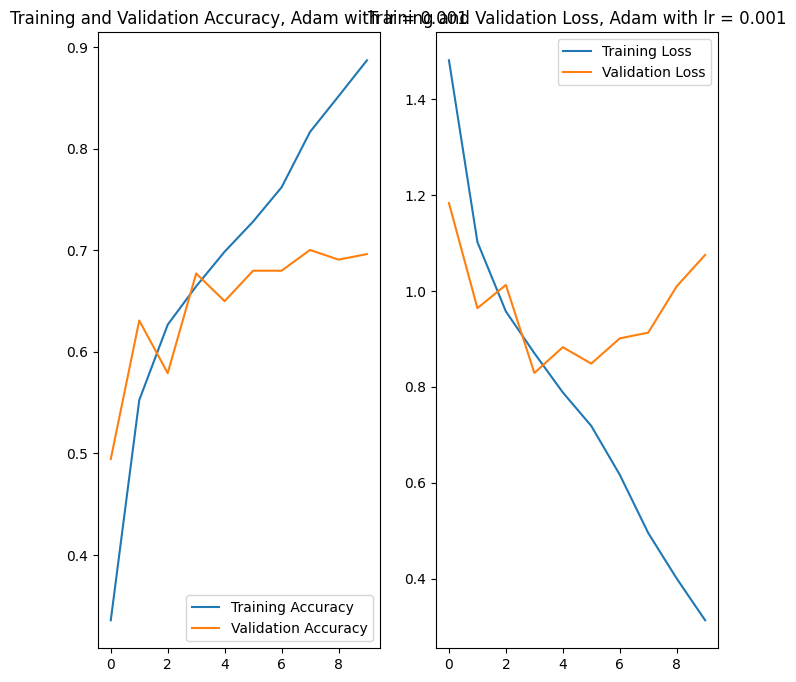

In [ ]:
acc = historyModelAdam001.history['accuracy']
val_acc = historyModelAdam001.history['val_accuracy']

loss = historyModelAdam001.history['loss']
val_loss = historyModelAdam001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, Adam with lr = 0.001')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, Adam with lr = 0.001')
plt.show()

In [ ]:
import pandas as pd

# get all histories
adamHistories = [historyModelAdam001.history, historyModelAdam01.history, historyModelAdam1.history]
sgdHistories = [historyModelSGD001.history, historyModelSGD01.history, historyModelSGD1.history]

# create data dictionary for table columns
data = {
    'Adam': list(),
    'SGD': list()
}

def getString(history):
  acc = history.get('accuracy')[-1]
  val_acc = history.get('val_accuracy')[-1]
  return "Acc.: {:.3f}, Val. Acc.: {:.3f}".format(acc, val_acc)

# put correct display vals in data dictionary
for item in adamHistories:
  data.get('Adam').append(getString(item))
for item in sgdHistories:
  data.get('SGD').append(getString(item))

# name rows
row_labels = ['lr = 0.001', 'lr = 0.01', 'lr = 0.1']

# make pandas data frame
df = pd.DataFrame(data, index=row_labels)
print(df)

                                     Adam                            SGD
lr = 0.001  Acc.: 0.887, Val. Acc.: 0.696  Acc.: 0.346, Val. Acc.: 0.337
lr = 0.01   Acc.: 0.246, Val. Acc.: 0.240  Acc.: 0.618, Val. Acc.: 0.609
lr = 0.1    Acc.: 0.240, Val. Acc.: 0.240  Acc.: 0.483, Val. Acc.: 0.358


# L2 Regularization

In [ ]:
# model
num_classes = len(train_ds.class_names)

In [ ]:
# best model
regValue = 0.01
regularizer = tf.keras.regularizers.l2(regValue)

bestModelL201 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(num_classes, kernel_regularizer=regularizer)
])

# compile model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
bestModelL201.compile(optimizer=adam_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyBestModelL201 = bestModelL201.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 314s 3s/step - loss: 2.8844 - accuracy: 0.2418 - val_loss: 1.6793 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 338s 4s/step - loss: 1.6428 - accuracy: 0.2459 - val_loss: 1.6242 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 311s 3s/step - loss: 1.6150 - accuracy: 0.2459 - val_loss: 1.6109 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 317s 3s/step - loss: 1.6073 - accuracy: 0.2459 - val_loss: 1.6068 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 327s 4s/step - loss: 1.6049 - accuracy: 0.2459 - val_loss: 1.6045 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 328s 4s/step - loss: 1.6029 - accuracy: 0.2459 - val_loss: 1.6035 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 331s 4s/step - loss: 1.6021 - accuracy: 0.2459 - val_loss: 1.6030 - val_accuracy: 0.2398
Epoch 8/10
92

In [ ]:
# best model
regValue = 0.1
regularizer = tf.keras.regularizers.l2(regValue)

bestModelL20point1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(num_classes, kernel_regularizer=regularizer)
])

# compile model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
bestModelL20point1.compile(optimizer=adam_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyBestModelL20point1 = bestModelL20point1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 335s 4s/step - loss: 12.1765 - accuracy: 0.2388 - val_loss: 1.9548 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 331s 4s/step - loss: 1.7594 - accuracy: 0.2394 - val_loss: 1.6579 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 308s 3s/step - loss: 1.6277 - accuracy: 0.2459 - val_loss: 1.6116 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 328s 4s/step - loss: 1.6055 - accuracy: 0.2459 - val_loss: 1.6039 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 303s 3s/step - loss: 1.6018 - accuracy: 0.2459 - val_loss: 1.6026 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 325s 4s/step - loss: 1.6010 - accuracy: 0.2459 - val_loss: 1.6022 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 305s 3s/step - loss: 1.6006 - accuracy: 0.2459 - val_loss: 1.6021 - val_accuracy: 0.2398
Epoch 8/10
9

In [ ]:
# best model
regValue = 1.0
regularizer = tf.keras.regularizers.l2(regValue)

bestModelL21point0 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=regularizer),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(num_classes, kernel_regularizer=regularizer)
])

# compile model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
bestModelL21point0.compile(optimizer=adam_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyBestModelL21point0 = bestModelL21point0.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 340s 4s/step - loss: 106.3599 - accuracy: 0.2459 - val_loss: 4.8368 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 311s 3s/step - loss: 3.0047 - accuracy: 0.2459 - val_loss: 2.0738 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 329s 4s/step - loss: 1.8141 - accuracy: 0.2459 - val_loss: 1.6685 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 305s 3s/step - loss: 1.6290 - accuracy: 0.2459 - val_loss: 1.6096 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 305s 3s/step - loss: 1.6040 - accuracy: 0.2459 - val_loss: 1.6028 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 327s 4s/step - loss: 1.6011 - accuracy: 0.2459 - val_loss: 1.6021 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 325s 4s/step - loss: 1.6006 - accuracy: 0.2459 - val_loss: 1.6020 - val_accuracy: 0.2398
Epoch 8/10


# Dropout

In [ ]:
# new model

dropoutVal = 0.25

bestModelDropOut25 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(dropoutVal),
  layers.Dense(num_classes)
])

# compile model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
bestModelDropOut25.compile(optimizer=adam_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyBestModelDropOut25 = bestModelDropOut25.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 328s 4s/step - loss: 1.6607 - accuracy: 0.2459 - val_loss: 1.5765 - val_accuracy: 0.3283
Epoch 2/10
92/92 [==============================] - 325s 4s/step - loss: 1.2854 - accuracy: 0.4475 - val_loss: 1.2004 - val_accuracy: 0.4850
Epoch 3/10
92/92 [==============================] - 341s 4s/step - loss: 1.1028 - accuracy: 0.5422 - val_loss: 1.0883 - val_accuracy: 0.5477
Epoch 4/10
92/92 [==============================] - 327s 4s/step - loss: 1.0056 - accuracy: 0.5947 - val_loss: 1.0356 - val_accuracy: 0.5858
Epoch 5/10
92/92 [==============================] - 343s 4s/step - loss: 0.9400 - accuracy: 0.6267 - val_loss: 0.8837 - val_accuracy: 0.6553
Epoch 6/10
92/92 [==============================] - 344s 4s/step - loss: 0.8768 - accuracy: 0.6468 - val_loss: 0.9359 - val_accuracy: 0.5872
Epoch 7/10
92/92 [==============================] - 327s 4s/step - loss: 0.8027 - accuracy: 0.6805 - val_loss: 0.8308 - val_accuracy: 0.6826
Epoch 8/10
92

In [ ]:
# new model

dropoutVal = 0.5

bestModelDropOut5 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(dropoutVal),
  layers.Dense(num_classes)
])

# compile model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
bestModelDropOut5.compile(optimizer=adam_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyBestModelDropOut5 = bestModelDropOut5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 401s 4s/step - loss: 1.6277 - accuracy: 0.2510 - val_loss: 1.5979 - val_accuracy: 0.2425
Epoch 2/10
92/92 [==============================] - 373s 4s/step - loss: 1.4567 - accuracy: 0.3382 - val_loss: 1.5484 - val_accuracy: 0.3283
Epoch 3/10
92/92 [==============================] - 369s 4s/step - loss: 1.2573 - accuracy: 0.4663 - val_loss: 1.3689 - val_accuracy: 0.4046
Epoch 4/10
92/92 [==============================] - 375s 4s/step - loss: 1.2037 - accuracy: 0.4857 - val_loss: 1.3108 - val_accuracy: 0.4278
Epoch 5/10
92/92 [==============================] - 369s 4s/step - loss: 1.1246 - accuracy: 0.5422 - val_loss: 1.2225 - val_accuracy: 0.4864
Epoch 6/10
92/92 [==============================] - 351s 4s/step - loss: 1.0909 - accuracy: 0.5644 - val_loss: 1.1591 - val_accuracy: 0.5027
Epoch 7/10
92/92 [==============================] - 348s 4s/step - loss: 1.0100 - accuracy: 0.5978 - val_loss: 1.1489 - val_accuracy: 0.5272
Epoch 8/10
92

In [ ]:
# new model

dropoutVal = 0.75

bestModelDropOut75 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(dropoutVal),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(dropoutVal),
  layers.Dense(num_classes)
])

# compile model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
bestModelDropOut75.compile(optimizer=adam_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
historyBestModelDropOut75 = bestModelDropOut75.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 353s 4s/step - loss: 2.1705 - accuracy: 0.2337 - val_loss: 1.6071 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 375s 4s/step - loss: 1.6052 - accuracy: 0.2452 - val_loss: 1.6051 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 370s 4s/step - loss: 1.6046 - accuracy: 0.2425 - val_loss: 1.6038 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 371s 4s/step - loss: 1.6028 - accuracy: 0.2452 - val_loss: 1.6030 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 384s 4s/step - loss: 1.5971 - accuracy: 0.2524 - val_loss: 1.6034 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 371s 4s/step - loss: 1.5856 - accuracy: 0.2561 - val_loss: 1.6490 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 379s 4s/step - loss: 1.5325 - accuracy: 0.2858 - val_loss: 2.0223 - val_accuracy: 0.2398
Epoch 8/10
92

In [9]:
import pandas as pd

# create data dictionary for table columns
data = {
    'L2 = [0.01, 0.1, 1.0]': list(),
    'Dropout = [0.25, 0.5, 0.75]': list()
}

data.get('L2 = [0.01, 0.1, 1.0]').append("Acc.: {:.3f}, Val. Acc.: {:.3f}".format(0.2459, 0.2398))
data.get('L2 = [0.01, 0.1, 1.0]').append("Acc.: {:.3f}, Val. Acc.: {:.3f}".format(0.2459, 0.2398))
data.get('L2 = [0.01, 0.1, 1.0]').append("Acc.: {:.3f}, Val. Acc.: {:.3f}".format(0.2459, 0.2398))
data.get('Dropout = [0.25, 0.5, 0.75]').append("Acc.: {:.3f}, Val. Acc.: {:.3f}".format(0.7299, 0.7330))
data.get('Dropout = [0.25, 0.5, 0.75]').append("Acc.: {:.3f}, Val. Acc.: {:.3f}".format(0.6349, 0.5436))
data.get('Dropout = [0.25, 0.5, 0.75]').append("Acc.: {:.3f}, Val. Acc.: {:.3f}".format(0.3975, 0.2398))

# name rows
row_labels = ['First Value', 'Second Value', 'Third Value']

# make pandas data frame
df = pd.DataFrame(data, index=row_labels)
print(df)

                      L2 = [0.01, 0.1, 1.0]    Dropout = [0.25, 0.5, 0.75]
First Value   Acc.: 0.246, Val. Acc.: 0.240  Acc.: 0.730, Val. Acc.: 0.733
Second Value  Acc.: 0.246, Val. Acc.: 0.240  Acc.: 0.635, Val. Acc.: 0.544
Third Value   Acc.: 0.246, Val. Acc.: 0.240  Acc.: 0.398, Val. Acc.: 0.240


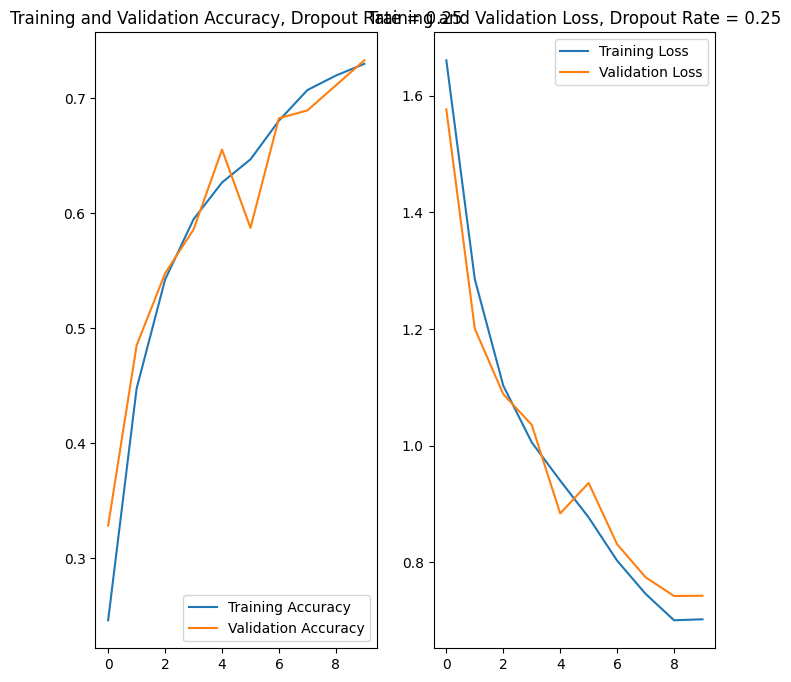

In [6]:
# make graphs
acc = [0.2459, 0.4475, 0.5422, 0.5947, 0.6267, 0.6468, 0.6805, 0.7071, 0.7197, 0.7299]
val_acc = [0.3283, 0.4850, 0.5477, 0.5858, 0.6553, 0.5872, 0.6826, 0.6894, 0.7112, 0.7330]

loss = [1.6607, 1.2854, 1.1028, 1.0056, 0.9400, 0.8768, 0.8027, 0.7458, 0.7005, 0.7022]
val_loss = [1.5765, 1.2004, 1.0883, 1.0356, 0.8837, 0.9359, 0.8308, 0.7742, 0.7421, 0.7426]

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, Dropout Rate = 0.25')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, Dropout Rate = 0.25')
plt.show()